In [ ]:
!pip install git+https://github.com/deng-group/MLE3112.git

    position                                         wavelength  \
0          0  [175.59291076660156, 176.19227600097656, 176.7...   
1          5  [175.59291076660156, 176.19227600097656, 176.7...   
2         10  [175.59291076660156, 176.19227600097656, 176.7...   
3         15  [175.59291076660156, 176.19227600097656, 176.7...   
4         20  [175.59291076660156, 176.19227600097656, 176.7...   
..       ...                                                ...   
68       340  [175.59291076660156, 176.19227600097656, 176.7...   
69       345  [175.59291076660156, 176.19227600097656, 176.7...   
70       350  [175.59291076660156, 176.19227600097656, 176.7...   
71       355  [175.59291076660156, 176.19227600097656, 176.7...   
72       360  [175.59291076660156, 176.19227600097656, 176.7...   

                                                 data  integrated_intensity  \
0   [136.0, 133.25, 133.25, 131.25, 130.5, 125.0, ...         402827.542248   
1   [129.5, 130.75, 124.25, 131.75, 1

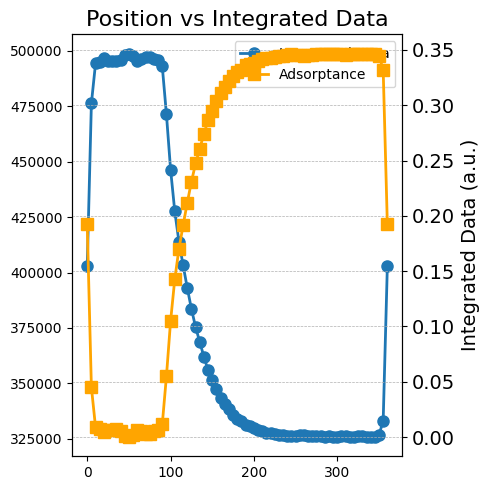

In [1]:
from mle3112.plot import plot

plot(data_file="/Users/zeyudeng/Desktop/workspace/teaching/MLE3112/data.csv", 
     wavelength_col_name='wavelength',
     intensity_col_name='data',
     integrated_intensity_col_name='integrated_intensity',)

In [7]:
!pip install h5py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 46.1 MB/s eta 0:00:00


In [2]:
from mle3112.measurement import measurement_three_filters, measurement_single_filter
measurement_three_filters(ser1='0', ser2='0', ser3='0', 
                          start=0, end=360-60, step=60,
                          data_file='data_three_filters.csv',
                          max_num_failure=10,
                          tol=1e-3,
                          integration_time=100.0,
                          kinesis_path='C:/Program Files/Thorlabs/Kinesis',
                          avaspecx64_dll_path = 'C:/AvaSpecX64-DLL_9.14.0.0/avaspecx64.dll',
                          dry_run=True,
                          continue_from=[0,60,180])

# measurement_single_filter(serial_number='0',
#                           start=0, end=360, step=60,
#                           data_file='data.csv',
#                           max_num_failure=10,
#                           tol=1e-3,
#                           integration_time=100.0,
#                           kinesis_path='C:/Program Files/Thorlabs/Kinesis',
#                           avaspecx64_dll_path = 'C:/AvaSpecX64-DLL_9.14.0.0/avaspecx64.dll',
#                           dry_run=True,
#                           overwrite_datafile=True,)




Continuing progress from 9/216
Previous run interrupted at position: [0, 60, 180]. Continuing from here..
Move motor to start positions: 0, 60, 180
4.63% (10/216) | 0.00s elapsed, 0.08s remaining | Measuring at positions: 0, 60, 180
5.09% (11/216) | 0.01s elapsed, 0.13s remaining | Measuring at positions: 0, 60, 240
5.56% (12/216) | 0.01s elapsed, 0.15s remaining | Measuring at positions: 0, 60, 300
6.02% (13/216) | 0.01s elapsed, 0.16s remaining | Measuring at positions: 0, 120, 0
6.48% (14/216) | 0.01s elapsed, 0.16s remaining | Measuring at positions: 0, 120, 60
6.94% (15/216) | 0.01s elapsed, 0.16s remaining | Measuring at positions: 0, 120, 120
7.41% (16/216) | 0.01s elapsed, 0.17s remaining | Measuring at positions: 0, 120, 180
7.87% (17/216) | 0.01s elapsed, 0.17s remaining | Measuring at positions: 0, 120, 240
8.33% (18/216) | 0.02s elapsed, 0.17s remaining | Measuring at positions: 0, 120, 300
8.80% (19/216) | 0.02s elapsed, 0.17s remaining | Measuring at positions: 0, 180, 0


In [1]:
from mle3112.solution import plot_integrated, plot

plot('data.csv', [0, 60, 120, 180, 240])


0 position                                                      0
wavelength    [175.59291076660156, 176.19227600097656, 176.7...
intensity     [136.0, 133.25, 133.25, 131.25, 130.5, 125.0, ...
Name: 0, dtype: object
60 position                                                     60
wavelength    [175.59291076660156, 176.19227600097656, 176.7...
intensity     [136.0, 134.25, 136.0, 134.25, 135.0, 129.0, 1...
Name: 12, dtype: object
120 position                                                    120
wavelength    [175.59291076660156, 176.19227600097656, 176.7...
intensity     [125.5, 137.5, 133.25, 132.5, 130.25, 128.25, ...
Name: 24, dtype: object
180 position                                                    180
wavelength    [175.59291076660156, 176.19227600097656, 176.7...
intensity     [134.75, 137.75, 130.75, 135.5, 136.25, 127.75...
Name: 36, dtype: object
240 position                                                    240
wavelength    [175.59291076660156, 176.19227600097656, 1

3 [  0 320 220]
[131.25 119.5  122.25 ... 123.5  128.25 124.5 ]


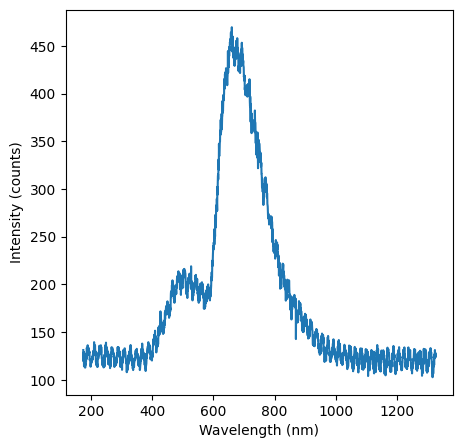

In [9]:
from mle3112.data import Data
import os
import numpy as np

data = Data('data_three_filters_measurement_new3.hdf',
            measurement_key='measurement_',
            position_key='position',
            wavelength_key='wavelength',
            intensity_key='intensity')

results = data.get_measurement(300)
print(len(results), results['position'])
print(results['intensity'])

# data.get_data_by_position(np.array([0, 0, 0]))
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(results['wavelength'], results['intensity'])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (counts)')
plt.show()
